In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df =pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
df.shape


(714, 3)

In [7]:
X= df.iloc[:,1:]
y= df.iloc[:,0]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [10]:
clf =DecisionTreeClassifier()

In [11]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [12]:
accuracy_score(y_test,y_pred)

0.6223776223776224

In [13]:
clf =DecisionTreeClassifier()
np.mean(cross_val_score(clf,X,y,cv=10,scoring='accuracy'))

0.6331181533646322

In [34]:
kbin_age = KBinsDiscretizer(n_bins = 15, encode = 'ordinal',strategy ='quantile')
kbin_fare = KBinsDiscretizer(n_bins = 15, encode = 'ordinal',strategy ='quantile')

In [35]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [36]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [37]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [38]:
output =pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [39]:
output['age_labels'] = pd.cut(x=X_train['Age'], bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train ['Fare'], bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [40]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
106,21.0,4.0,7.650,1.0,"(19.0, 21.0]","(7.25, 7.775]"
553,22.0,4.0,7.225,0.0,"(21.0, 23.0]","(0.0, 7.25]"
23,28.0,7.0,35.500,11.0,"(25.0, 28.0]","(31.275, 51.479]"
417,18.0,2.0,13.000,6.0,"(16.0, 19.0]","(10.5, 13.0]"
486,35.0,10.0,90.000,13.0,"(32.0, 35.0]","(76.292, 108.9]"


In [41]:
clf= DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2=clf.predict(X_test_trf)

In [42]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [47]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6359154929577465

In [50]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf=ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_age,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title('After')

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title('After')

    plt.show()

0.6723982785602504


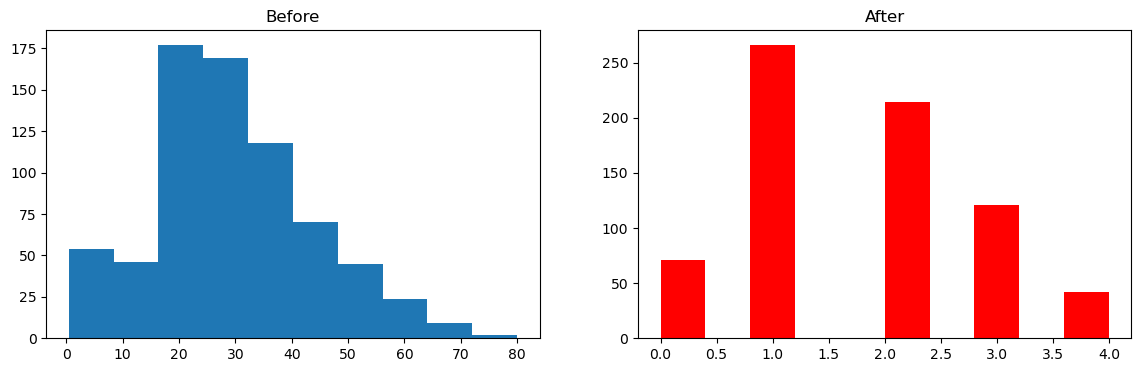

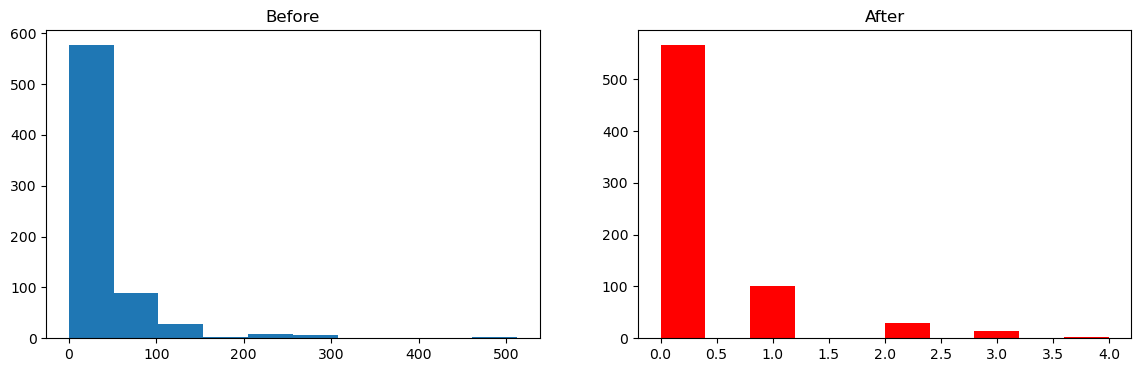

In [54]:
discretize(5,'kmeans')